# MNIST Image Generation Using GANs

This notebook includes the code to train our GAN model for image generation using the MNIST dataset. This will be done using PyTorch.

In [1]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import json
import os
import random
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


### Data Loading

Loading MNIST dataset with normalized images into training and testing sets.

In [3]:
image_size = 28
# Define transformations
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(), # Convert the image to a 3D tensor
    transforms.Normalize((0.5,), (0.5,)) # Normalize images to [-1,1]
])

# Load the training and test sets using transform
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Define batch size and data loaders
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [4]:
# Print shape of training and test datasets
print(train_dataset.data.shape)
print(test_dataset.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


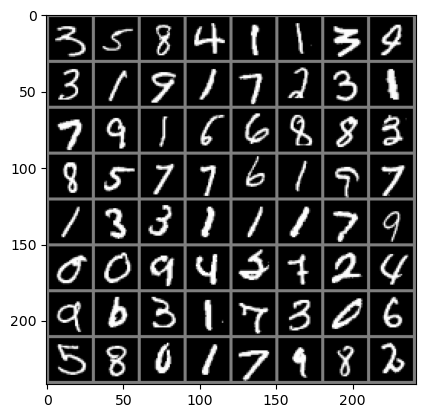

In [5]:
# Function to plot a few sample images from dataset
def imshow(img):
    img = img.cpu() / 2 + 0.5 # Unnormalize image to [0,1]
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1,2,0)))
    plt.show

# Get batch from train_loader
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Plotting images
imshow(torchvision.utils.make_grid(images))

### Defining Models

A GAN relies on two competing models -- a generator and a discriminator. The discriminators job is to classify on whether or not an image is a true image from the datset or a generated image from the generator. The generator is attempting to "fool" the discriminator into classifying generated images as real.



In [108]:
# Generator class
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.ConvTranspose2d(100, 256, 7, 1, 0),
            nn.BatchNorm2d(256, eps=1e-5, momentum=0.1),
            nn.ReLU(True),

            nn.ConvTranspose2d(256, 128, 4, 2, 1),
            nn.BatchNorm2d(128, eps=1e-5, momentum=0.1),
            nn.ReLU(True),

            nn.ConvTranspose2d(128, 1, 4, 2, 1),
            nn.Tanh()
        )
    
    def forward(self, input):
        return self.model(input)
    
# Discriminator class
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 128, 4, 2, 1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),

            nn.Conv2d(128, 256, 4, 2, 1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),

            nn.Conv2d(256, 1, 7, 1, 0),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.model(x)

In [109]:
generator = Generator().to(device)
discriminator = Discriminator().to(device)

print(generator)
print(discriminator)

Generator(
  (model): Sequential(
    (0): ConvTranspose2d(100, 256, kernel_size=(7, 7), stride=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(128, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): Tanh()
  )
)
Discriminator(
  (model): Sequential(
    (0): Conv2d(1, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Dropout(p=0.3, inplace=False)
    (3): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.2, inplace=True)
    (6): Dropout(p=0.3, inplace=False)
    

In [110]:
# Using binary cross entropy loss as loss function
criterion = nn.BCELoss()

# Define optimizers, using Adam optimizer for generatoer, SGD for discriminator
g_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0002, betas=(.5, .999))
d_optimizer = torch.optim.SGD(discriminator.parameters(), lr=0.0002, momentum=.9)

### Model Training

In [111]:
num_epochs = 200
d_losses = [] # list to store discriminator losses
g_losses = [] # list to store generator losses

Epoch [1/200], Step [938/938], D Loss: 0.6961, G Loss: 1.6208


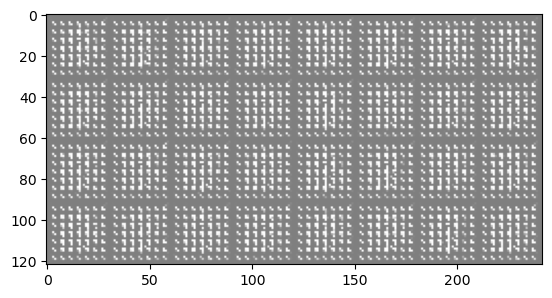

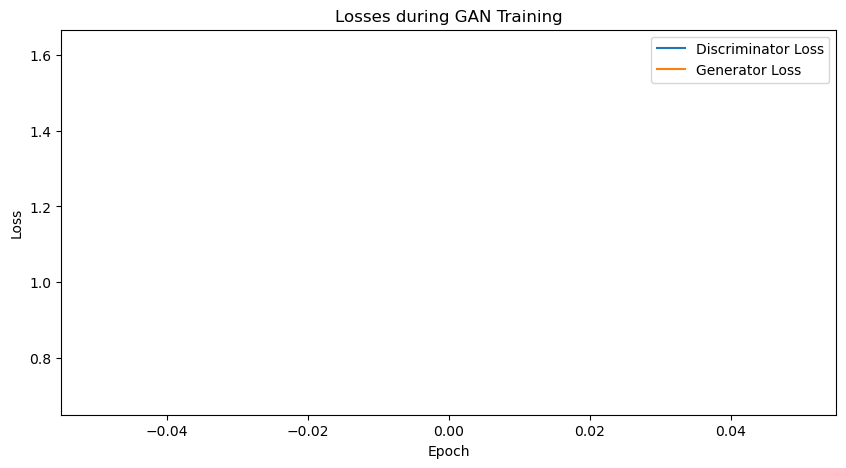

Epoch [2/200], Step [938/938], D Loss: 1.5970, G Loss: 0.7553
Epoch [3/200], Step [938/938], D Loss: 1.3158, G Loss: 1.3162
Epoch [4/200], Step [938/938], D Loss: 1.1016, G Loss: 1.0721
Epoch [5/200], Step [938/938], D Loss: 1.2474, G Loss: 1.0573
Epoch [6/200], Step [938/938], D Loss: 1.1391, G Loss: 0.9595
Epoch [7/200], Step [938/938], D Loss: 1.3523, G Loss: 0.8405
Epoch [8/200], Step [938/938], D Loss: 1.2520, G Loss: 0.8013
Epoch [9/200], Step [938/938], D Loss: 1.2012, G Loss: 0.9674
Epoch [10/200], Step [938/938], D Loss: 1.1804, G Loss: 0.9889
Epoch [11/200], Step [938/938], D Loss: 1.1370, G Loss: 1.1726


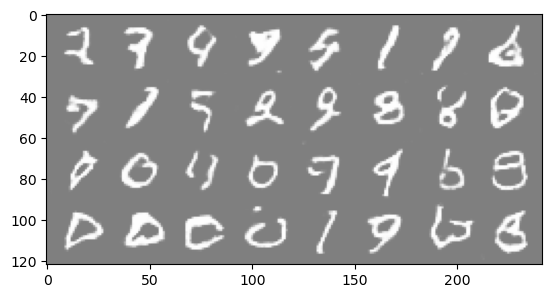

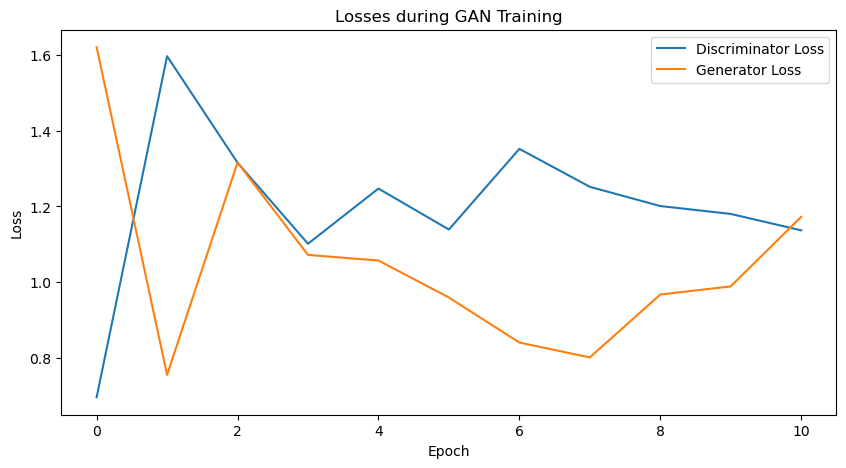

Epoch [12/200], Step [938/938], D Loss: 1.5604, G Loss: 0.8210
Epoch [13/200], Step [938/938], D Loss: 1.2379, G Loss: 1.1512
Epoch [14/200], Step [938/938], D Loss: 1.4320, G Loss: 0.9986
Epoch [15/200], Step [938/938], D Loss: 1.2135, G Loss: 0.8891
Epoch [16/200], Step [938/938], D Loss: 1.1774, G Loss: 0.9087
Epoch [17/200], Step [938/938], D Loss: 1.3784, G Loss: 0.8621
Epoch [18/200], Step [938/938], D Loss: 1.0260, G Loss: 1.1193
Epoch [19/200], Step [938/938], D Loss: 1.0772, G Loss: 1.4848
Epoch [20/200], Step [938/938], D Loss: 0.9642, G Loss: 1.0635
Epoch [21/200], Step [938/938], D Loss: 1.1276, G Loss: 1.1315


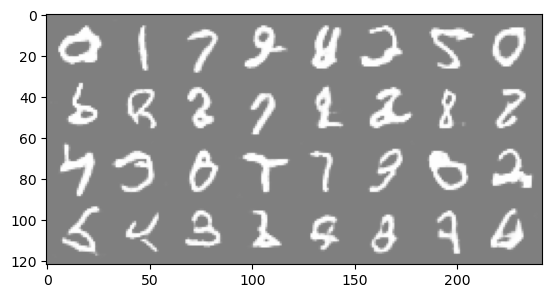

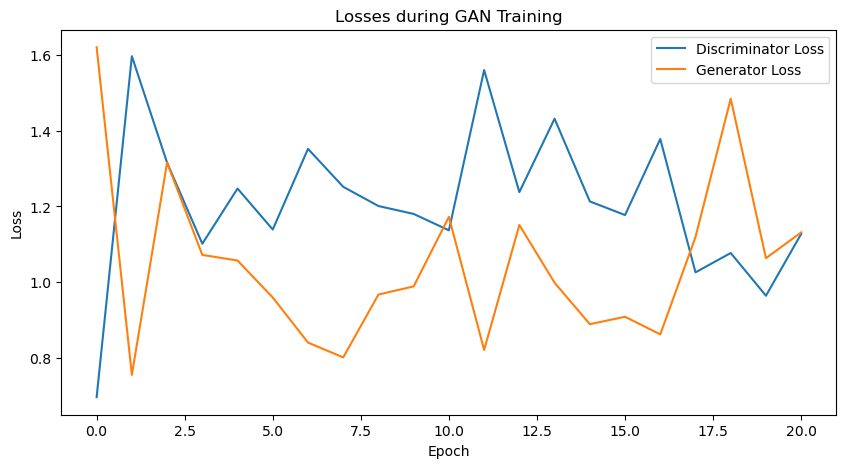

Epoch [22/200], Step [938/938], D Loss: 1.4469, G Loss: 1.2021
Epoch [23/200], Step [938/938], D Loss: 1.0833, G Loss: 0.8341
Epoch [24/200], Step [938/938], D Loss: 1.1889, G Loss: 0.8910
Epoch [25/200], Step [938/938], D Loss: 1.3260, G Loss: 0.7049
Epoch [26/200], Step [938/938], D Loss: 1.2097, G Loss: 1.2683
Epoch [27/200], Step [938/938], D Loss: 1.5052, G Loss: 0.8358
Epoch [28/200], Step [938/938], D Loss: 1.2020, G Loss: 1.1208
Epoch [29/200], Step [938/938], D Loss: 1.2924, G Loss: 1.6693
Epoch [30/200], Step [938/938], D Loss: 0.9929, G Loss: 1.2043
Epoch [31/200], Step [938/938], D Loss: 1.2868, G Loss: 0.6110


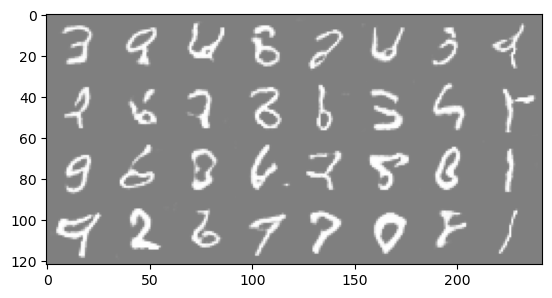

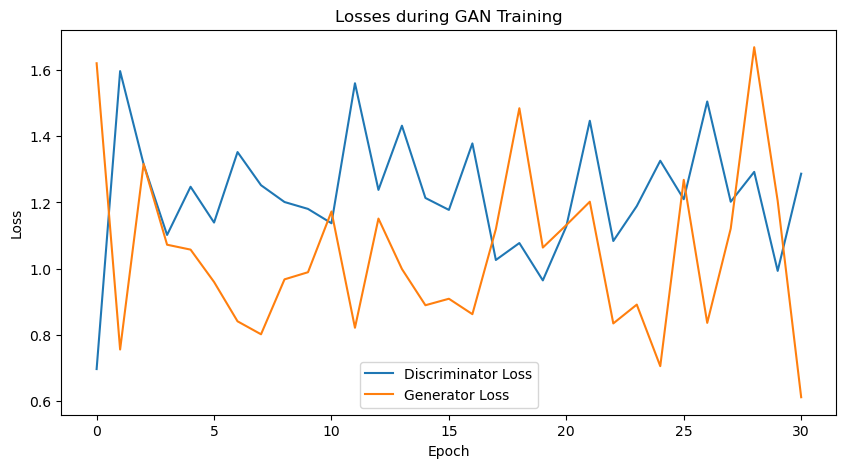

Epoch [32/200], Step [938/938], D Loss: 1.0986, G Loss: 1.0262
Epoch [33/200], Step [938/938], D Loss: 1.1071, G Loss: 1.0711
Epoch [34/200], Step [938/938], D Loss: 1.3440, G Loss: 1.3848
Epoch [35/200], Step [938/938], D Loss: 0.8944, G Loss: 1.2648
Epoch [36/200], Step [938/938], D Loss: 0.9323, G Loss: 1.4417
Epoch [37/200], Step [938/938], D Loss: 1.0843, G Loss: 0.8830
Epoch [38/200], Step [938/938], D Loss: 1.1367, G Loss: 1.0134
Epoch [39/200], Step [938/938], D Loss: 1.2998, G Loss: 1.3967
Epoch [40/200], Step [938/938], D Loss: 1.0148, G Loss: 1.2245
Epoch [41/200], Step [938/938], D Loss: 0.8037, G Loss: 0.8497


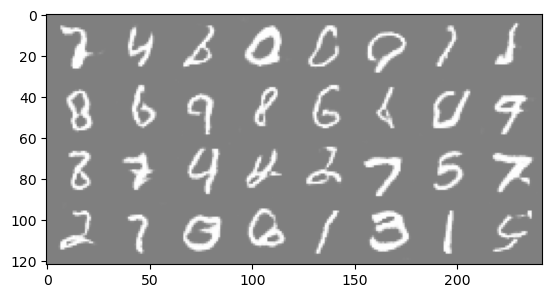

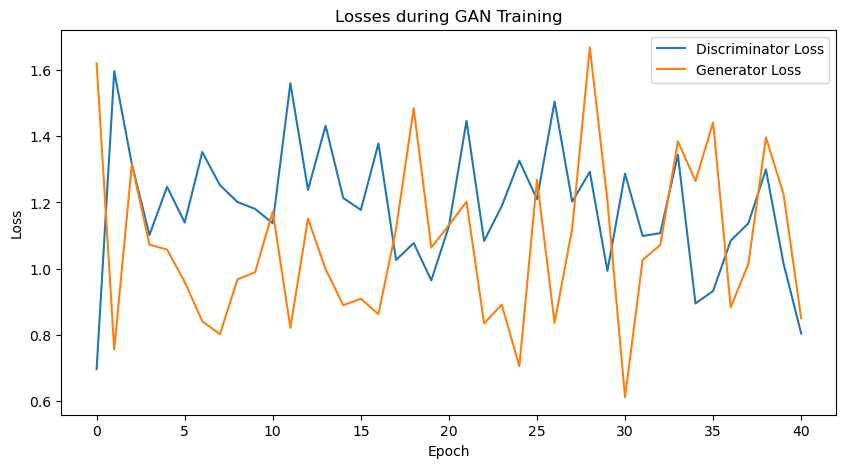

Epoch [42/200], Step [938/938], D Loss: 0.9662, G Loss: 0.9872
Epoch [43/200], Step [938/938], D Loss: 0.9274, G Loss: 1.3650
Epoch [44/200], Step [938/938], D Loss: 1.3188, G Loss: 1.1066
Epoch [45/200], Step [938/938], D Loss: 1.1736, G Loss: 2.0440
Epoch [46/200], Step [938/938], D Loss: 1.0506, G Loss: 1.1092
Epoch [47/200], Step [938/938], D Loss: 0.8667, G Loss: 0.9755
Epoch [48/200], Step [938/938], D Loss: 1.4185, G Loss: 1.0219
Epoch [49/200], Step [938/938], D Loss: 1.1055, G Loss: 1.5941
Epoch [50/200], Step [938/938], D Loss: 1.5464, G Loss: 1.0838
Epoch [51/200], Step [938/938], D Loss: 1.1009, G Loss: 0.7050


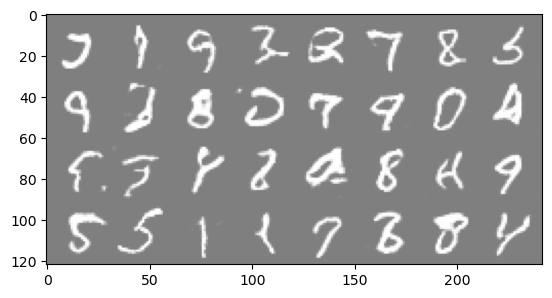

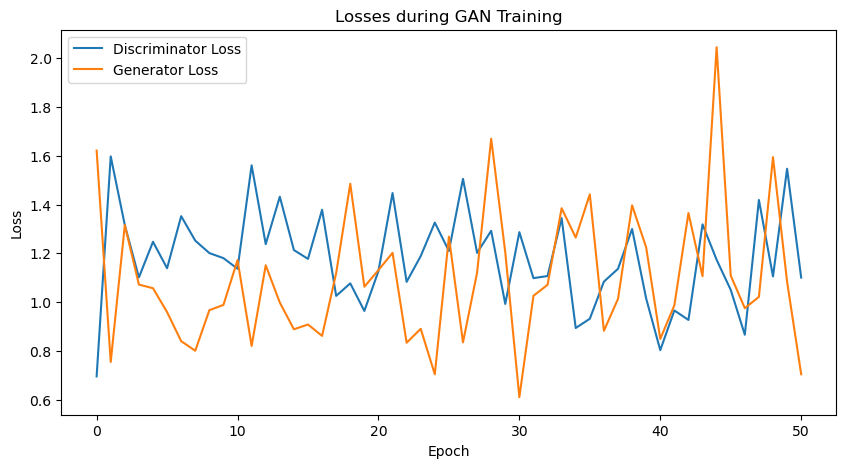

Epoch [52/200], Step [938/938], D Loss: 0.9936, G Loss: 1.4714
Epoch [53/200], Step [938/938], D Loss: 1.2999, G Loss: 1.4784
Epoch [54/200], Step [938/938], D Loss: 1.6665, G Loss: 1.3698
Epoch [55/200], Step [938/938], D Loss: 0.9436, G Loss: 0.7995
Epoch [56/200], Step [938/938], D Loss: 0.9425, G Loss: 1.1267
Epoch [57/200], Step [938/938], D Loss: 0.7180, G Loss: 1.2743
Epoch [58/200], Step [938/938], D Loss: 1.0864, G Loss: 1.4702
Epoch [59/200], Step [938/938], D Loss: 1.1259, G Loss: 1.3124
Epoch [60/200], Step [938/938], D Loss: 1.0529, G Loss: 1.6614
Epoch [61/200], Step [938/938], D Loss: 1.0173, G Loss: 0.6968


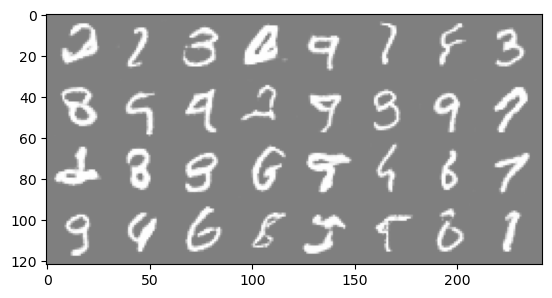

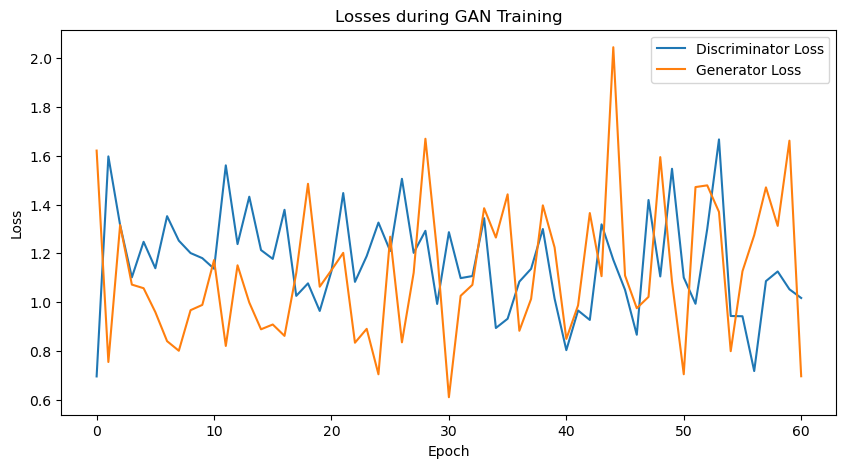

Epoch [62/200], Step [938/938], D Loss: 1.0034, G Loss: 1.5455
Epoch [63/200], Step [938/938], D Loss: 1.1186, G Loss: 1.2202
Epoch [64/200], Step [938/938], D Loss: 1.2869, G Loss: 1.0815
Epoch [65/200], Step [938/938], D Loss: 0.7783, G Loss: 1.0980
Epoch [66/200], Step [938/938], D Loss: 1.3040, G Loss: 0.9489
Epoch [67/200], Step [938/938], D Loss: 1.0328, G Loss: 0.7488
Epoch [68/200], Step [938/938], D Loss: 1.1181, G Loss: 1.1693
Epoch [69/200], Step [938/938], D Loss: 1.4440, G Loss: 1.4147
Epoch [70/200], Step [938/938], D Loss: 1.0581, G Loss: 0.9133
Epoch [71/200], Step [938/938], D Loss: 1.0216, G Loss: 0.7007


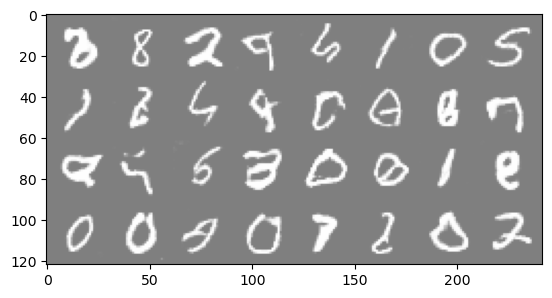

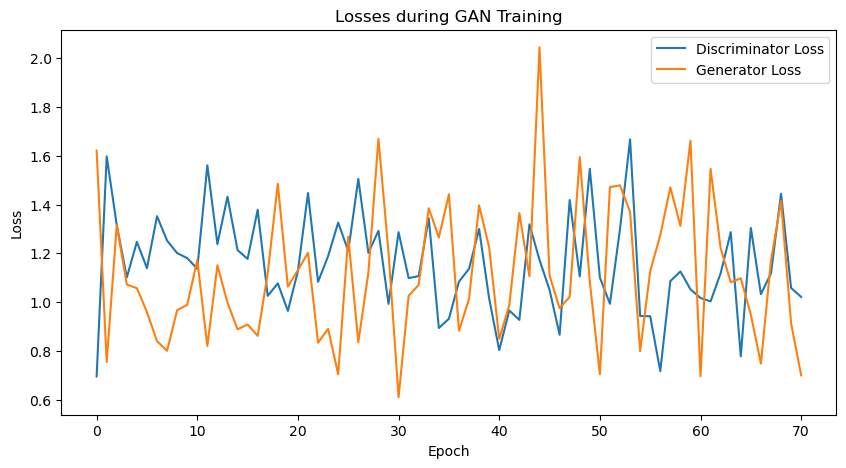

Epoch [72/200], Step [938/938], D Loss: 0.8794, G Loss: 0.8139
Epoch [73/200], Step [938/938], D Loss: 1.2539, G Loss: 1.7349
Epoch [74/200], Step [938/938], D Loss: 1.1374, G Loss: 1.2943
Epoch [75/200], Step [938/938], D Loss: 1.3566, G Loss: 1.9805
Epoch [76/200], Step [938/938], D Loss: 1.3390, G Loss: 1.1516
Epoch [77/200], Step [938/938], D Loss: 1.2058, G Loss: 1.2330
Epoch [78/200], Step [938/938], D Loss: 0.8485, G Loss: 1.8016
Epoch [79/200], Step [938/938], D Loss: 1.1380, G Loss: 0.6080
Epoch [80/200], Step [938/938], D Loss: 0.8054, G Loss: 1.3745
Epoch [81/200], Step [938/938], D Loss: 1.0463, G Loss: 1.4060


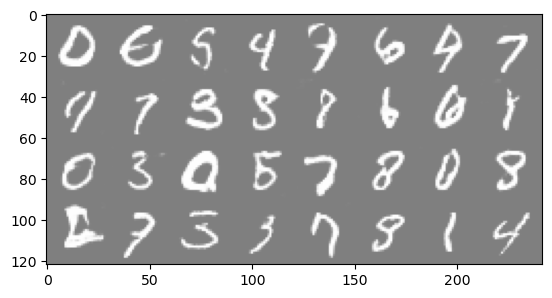

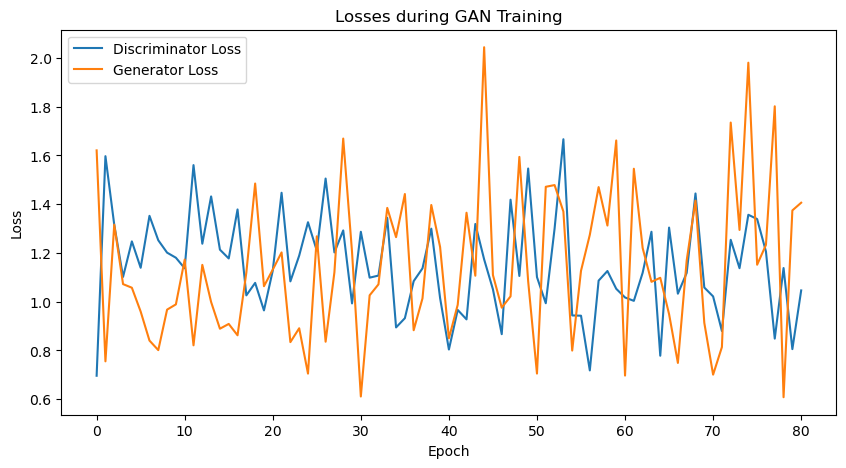

Epoch [82/200], Step [938/938], D Loss: 0.7827, G Loss: 2.1965
Epoch [83/200], Step [938/938], D Loss: 0.9953, G Loss: 1.5394
Epoch [84/200], Step [938/938], D Loss: 0.9704, G Loss: 0.8858
Epoch [85/200], Step [938/938], D Loss: 1.2011, G Loss: 1.1643
Epoch [86/200], Step [938/938], D Loss: 1.3390, G Loss: 0.7020
Epoch [87/200], Step [938/938], D Loss: 0.5919, G Loss: 1.2099
Epoch [88/200], Step [938/938], D Loss: 1.0987, G Loss: 1.1949
Epoch [89/200], Step [938/938], D Loss: 1.3203, G Loss: 1.6786
Epoch [90/200], Step [938/938], D Loss: 1.2014, G Loss: 0.8847
Epoch [91/200], Step [938/938], D Loss: 0.7108, G Loss: 1.0200


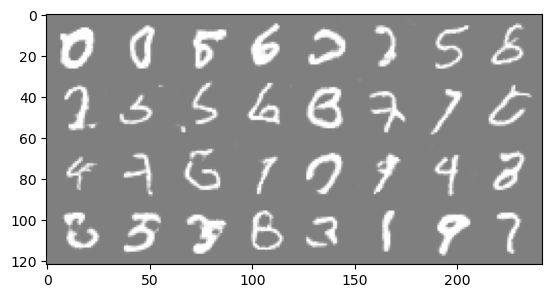

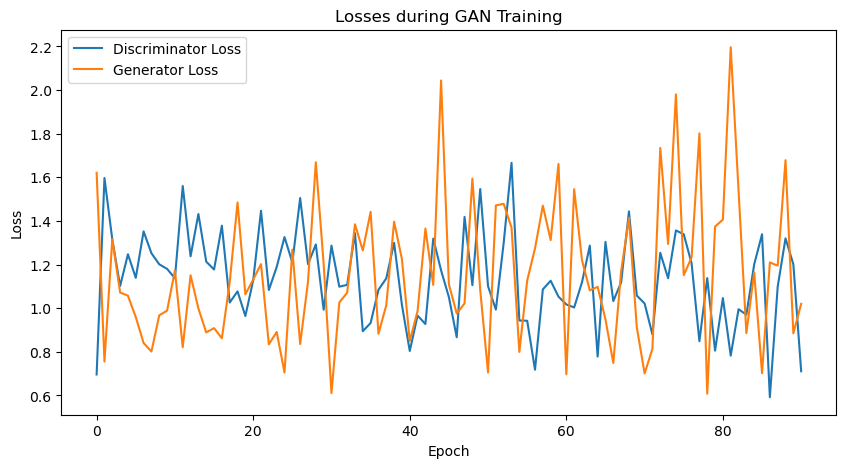

Epoch [92/200], Step [938/938], D Loss: 0.8587, G Loss: 0.6639
Epoch [93/200], Step [938/938], D Loss: 1.4945, G Loss: 1.9327
Epoch [94/200], Step [938/938], D Loss: 1.0293, G Loss: 1.2074
Epoch [95/200], Step [938/938], D Loss: 0.8384, G Loss: 0.7785
Epoch [96/200], Step [938/938], D Loss: 1.0226, G Loss: 1.2275
Epoch [97/200], Step [938/938], D Loss: 0.6630, G Loss: 2.1647
Epoch [98/200], Step [938/938], D Loss: 0.9805, G Loss: 1.5645
Epoch [99/200], Step [938/938], D Loss: 1.0661, G Loss: 1.4322
Epoch [100/200], Step [938/938], D Loss: 0.7358, G Loss: 1.7054
Epoch [101/200], Step [938/938], D Loss: 1.0373, G Loss: 2.1028


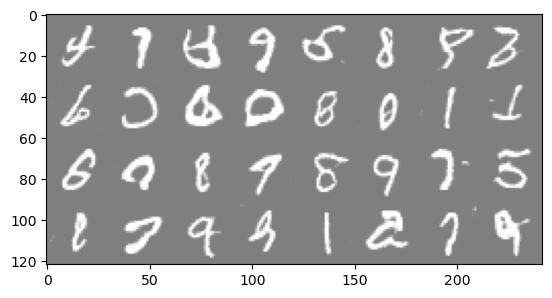

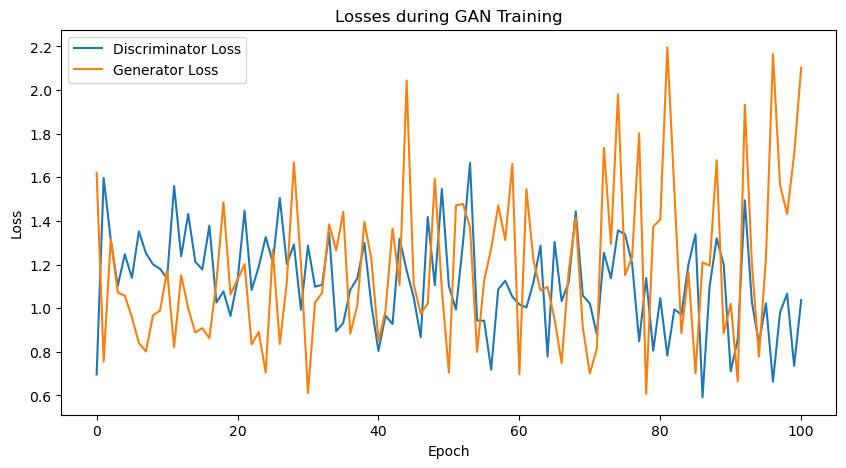

Epoch [102/200], Step [938/938], D Loss: 1.5293, G Loss: 0.7717
Epoch [103/200], Step [938/938], D Loss: 1.3476, G Loss: 1.4813
Epoch [104/200], Step [938/938], D Loss: 1.3057, G Loss: 1.8467
Epoch [105/200], Step [938/938], D Loss: 1.7296, G Loss: 1.4607
Epoch [106/200], Step [938/938], D Loss: 0.7220, G Loss: 0.8935
Epoch [107/200], Step [938/938], D Loss: 0.9750, G Loss: 1.0937
Epoch [108/200], Step [938/938], D Loss: 1.0358, G Loss: 1.3220
Epoch [109/200], Step [938/938], D Loss: 1.4107, G Loss: 0.9066
Epoch [110/200], Step [938/938], D Loss: 1.5216, G Loss: 1.8304
Epoch [111/200], Step [938/938], D Loss: 1.2490, G Loss: 0.8552


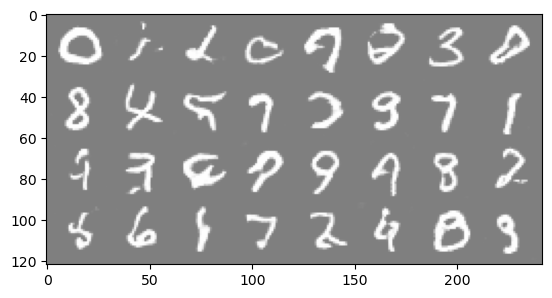

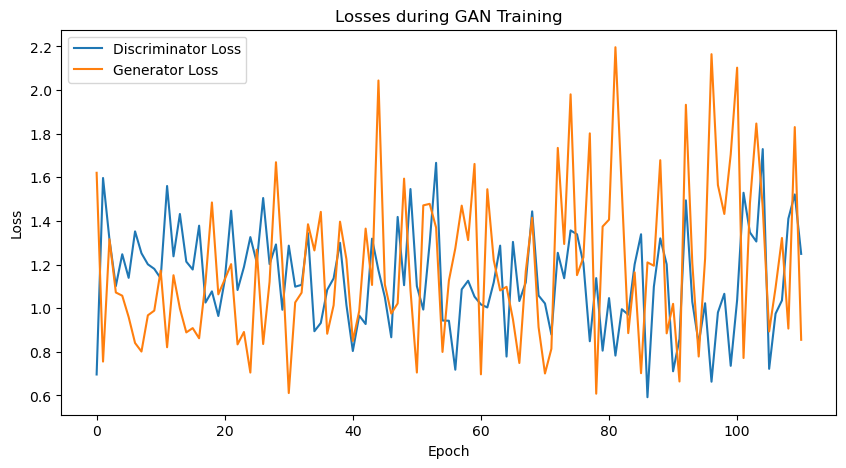

Epoch [112/200], Step [938/938], D Loss: 0.8840, G Loss: 1.3778
Epoch [113/200], Step [938/938], D Loss: 0.9879, G Loss: 1.6399
Epoch [114/200], Step [938/938], D Loss: 1.0177, G Loss: 1.2970
Epoch [115/200], Step [938/938], D Loss: 0.9088, G Loss: 1.4757
Epoch [116/200], Step [938/938], D Loss: 0.9467, G Loss: 1.1539
Epoch [117/200], Step [938/938], D Loss: 1.2937, G Loss: 1.3741
Epoch [118/200], Step [938/938], D Loss: 1.0790, G Loss: 1.2513
Epoch [119/200], Step [938/938], D Loss: 1.0254, G Loss: 1.9179
Epoch [120/200], Step [938/938], D Loss: 0.6403, G Loss: 0.8543
Epoch [121/200], Step [938/938], D Loss: 1.6637, G Loss: 0.8482


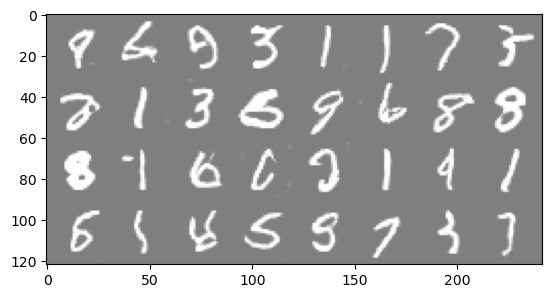

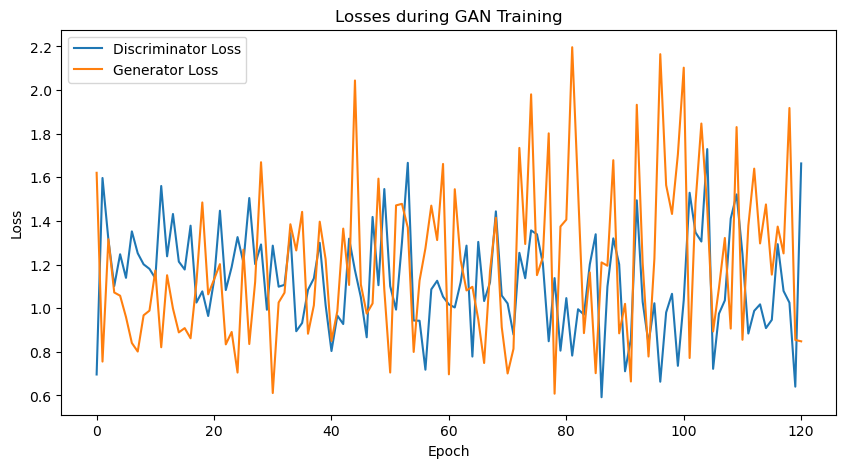

Epoch [122/200], Step [938/938], D Loss: 1.0548, G Loss: 1.0037
Epoch [123/200], Step [938/938], D Loss: 0.8393, G Loss: 1.6775
Epoch [124/200], Step [938/938], D Loss: 1.4576, G Loss: 1.5435
Epoch [125/200], Step [938/938], D Loss: 0.5787, G Loss: 1.3138
Epoch [126/200], Step [938/938], D Loss: 0.8498, G Loss: 1.5198
Epoch [127/200], Step [938/938], D Loss: 0.9635, G Loss: 0.9685
Epoch [128/200], Step [938/938], D Loss: 1.0777, G Loss: 1.3073
Epoch [129/200], Step [938/938], D Loss: 0.8305, G Loss: 1.5402
Epoch [130/200], Step [938/938], D Loss: 0.9619, G Loss: 0.9956
Epoch [131/200], Step [938/938], D Loss: 1.3340, G Loss: 1.2092


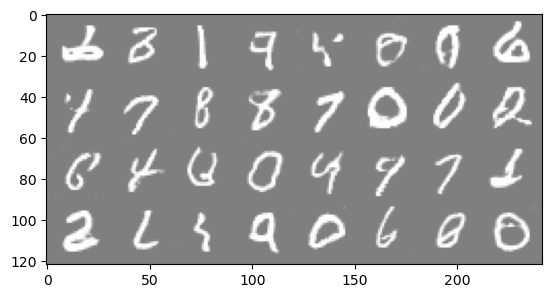

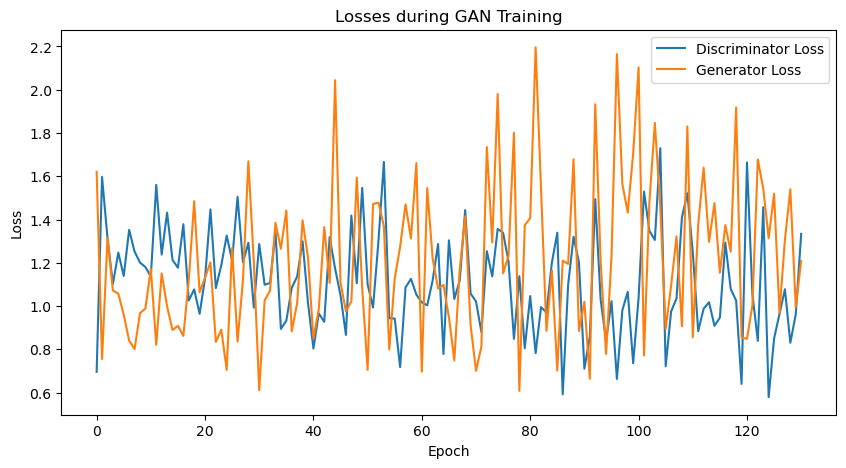

Epoch [132/200], Step [938/938], D Loss: 1.4109, G Loss: 2.0125
Epoch [133/200], Step [938/938], D Loss: 1.3180, G Loss: 1.1910
Epoch [134/200], Step [938/938], D Loss: 1.0575, G Loss: 1.6762
Epoch [135/200], Step [938/938], D Loss: 0.8059, G Loss: 2.2663
Epoch [136/200], Step [938/938], D Loss: 0.8805, G Loss: 1.8650
Epoch [137/200], Step [938/938], D Loss: 1.1387, G Loss: 1.1139
Epoch [138/200], Step [938/938], D Loss: 1.0250, G Loss: 1.0747
Epoch [139/200], Step [938/938], D Loss: 0.9923, G Loss: 0.7088
Epoch [140/200], Step [938/938], D Loss: 0.9772, G Loss: 0.9764
Epoch [141/200], Step [938/938], D Loss: 1.1097, G Loss: 2.0375


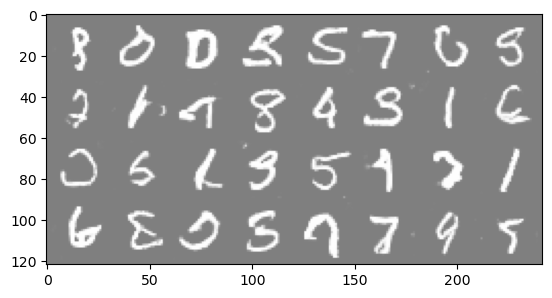

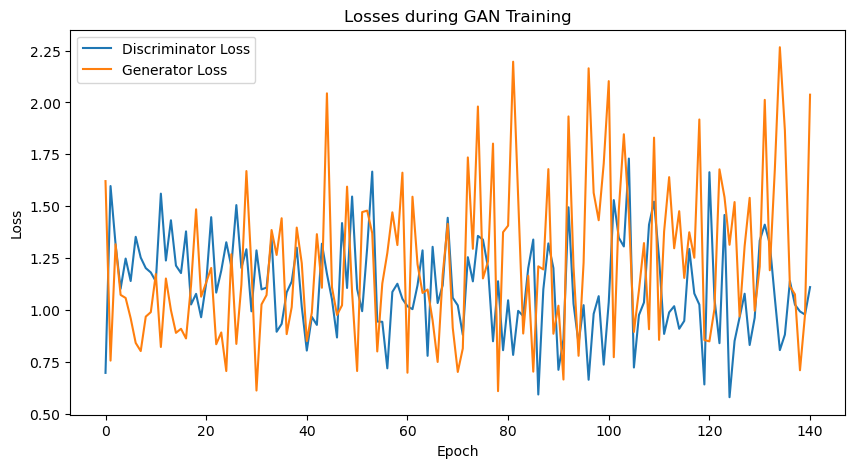

Epoch [142/200], Step [938/938], D Loss: 0.7571, G Loss: 1.5103
Epoch [143/200], Step [938/938], D Loss: 0.8034, G Loss: 0.7563
Epoch [144/200], Step [938/938], D Loss: 0.8076, G Loss: 1.0091
Epoch [145/200], Step [938/938], D Loss: 1.6439, G Loss: 1.5502
Epoch [146/200], Step [938/938], D Loss: 1.2486, G Loss: 1.0099
Epoch [147/200], Step [938/938], D Loss: 0.8716, G Loss: 1.7810
Epoch [148/200], Step [938/938], D Loss: 0.9446, G Loss: 1.3131
Epoch [149/200], Step [938/938], D Loss: 0.7124, G Loss: 1.2802
Epoch [150/200], Step [938/938], D Loss: 1.0963, G Loss: 1.8713
Epoch [151/200], Step [938/938], D Loss: 0.7290, G Loss: 0.9755


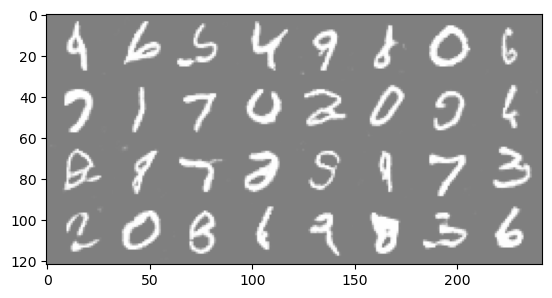

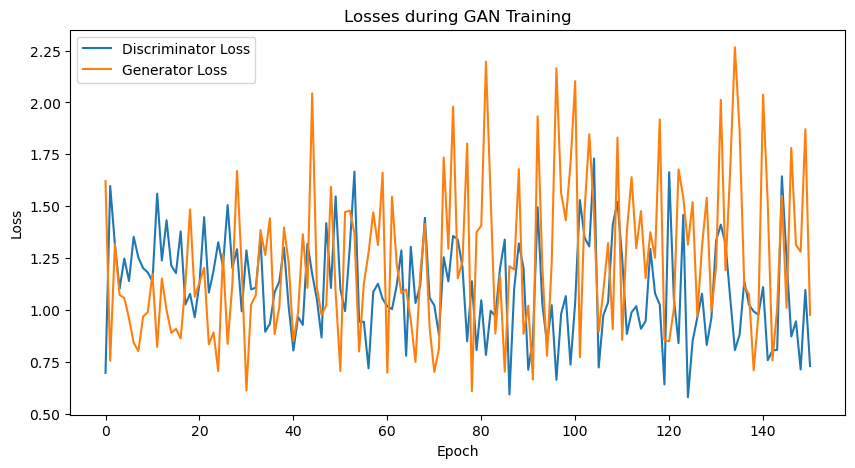

Epoch [152/200], Step [938/938], D Loss: 0.8101, G Loss: 1.0977
Epoch [153/200], Step [938/938], D Loss: 1.1349, G Loss: 2.6603
Epoch [154/200], Step [938/938], D Loss: 0.6987, G Loss: 1.8744
Epoch [155/200], Step [938/938], D Loss: 1.1706, G Loss: 1.9915
Epoch [156/200], Step [938/938], D Loss: 0.9284, G Loss: 1.4302
Epoch [157/200], Step [938/938], D Loss: 0.7555, G Loss: 1.5174
Epoch [158/200], Step [938/938], D Loss: 1.8341, G Loss: 0.9180
Epoch [159/200], Step [938/938], D Loss: 0.8988, G Loss: 1.6044
Epoch [160/200], Step [938/938], D Loss: 1.3899, G Loss: 1.0000
Epoch [161/200], Step [938/938], D Loss: 0.8721, G Loss: 1.2439


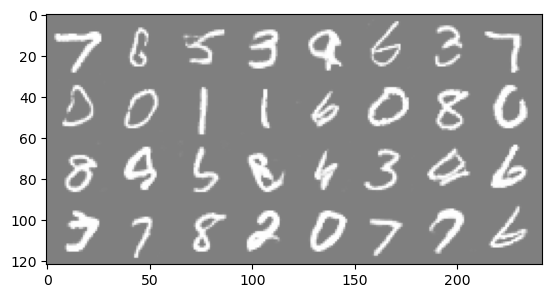

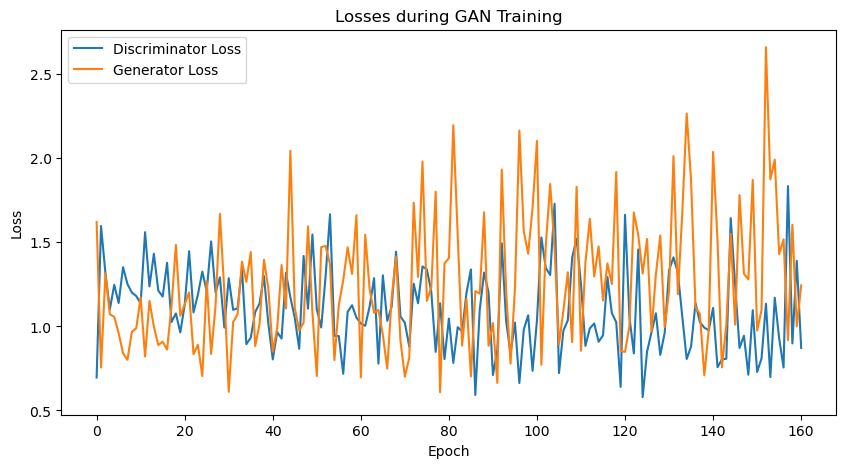

Epoch [162/200], Step [938/938], D Loss: 0.6410, G Loss: 0.9458
Epoch [163/200], Step [938/938], D Loss: 0.6018, G Loss: 2.0639
Epoch [164/200], Step [938/938], D Loss: 1.5823, G Loss: 1.6729
Epoch [165/200], Step [938/938], D Loss: 1.0519, G Loss: 1.2587
Epoch [166/200], Step [938/938], D Loss: 1.1559, G Loss: 2.0597
Epoch [167/200], Step [938/938], D Loss: 1.0340, G Loss: 1.0799
Epoch [168/200], Step [938/938], D Loss: 0.7774, G Loss: 0.7617
Epoch [169/200], Step [938/938], D Loss: 1.0863, G Loss: 0.8439
Epoch [170/200], Step [938/938], D Loss: 1.4387, G Loss: 1.2870
Epoch [171/200], Step [938/938], D Loss: 1.0580, G Loss: 0.8303


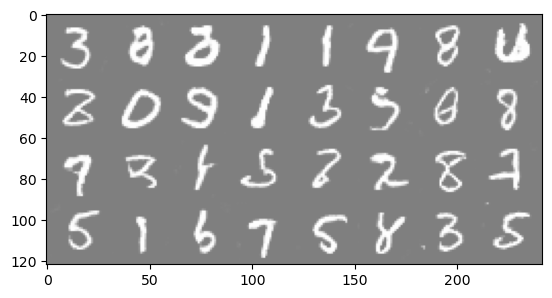

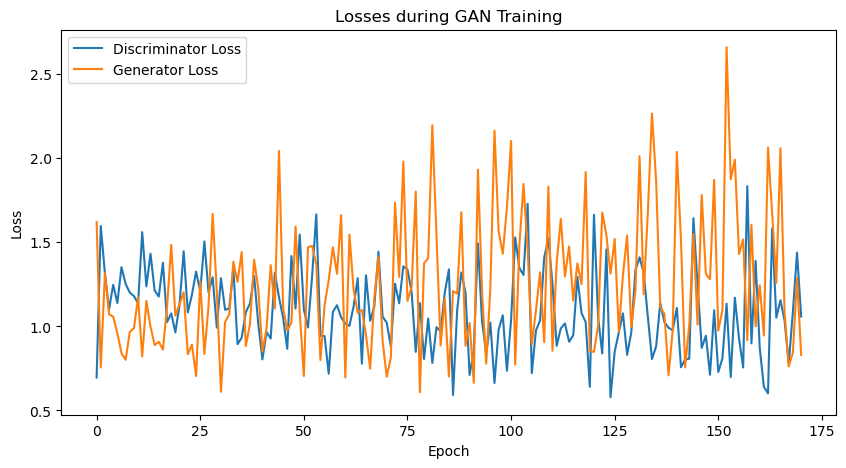

Epoch [172/200], Step [938/938], D Loss: 0.9583, G Loss: 1.6407
Epoch [173/200], Step [938/938], D Loss: 1.9602, G Loss: 1.1580
Epoch [174/200], Step [938/938], D Loss: 0.8255, G Loss: 1.4207
Epoch [175/200], Step [938/938], D Loss: 0.9356, G Loss: 1.3189
Epoch [176/200], Step [938/938], D Loss: 1.4035, G Loss: 1.2254
Epoch [177/200], Step [938/938], D Loss: 0.7281, G Loss: 0.7933
Epoch [178/200], Step [938/938], D Loss: 0.9504, G Loss: 1.1955
Epoch [179/200], Step [938/938], D Loss: 1.3585, G Loss: 1.3402
Epoch [180/200], Step [938/938], D Loss: 0.8154, G Loss: 1.5004
Epoch [181/200], Step [938/938], D Loss: 1.2229, G Loss: 1.7844


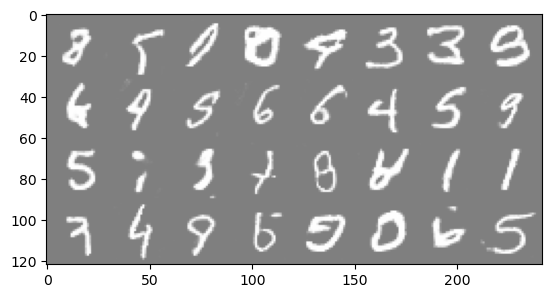

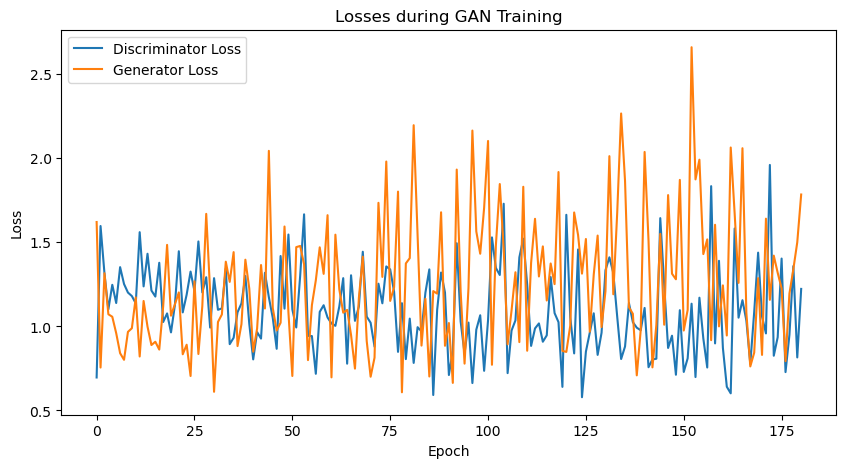

Epoch [182/200], Step [938/938], D Loss: 0.8592, G Loss: 1.1171
Epoch [183/200], Step [938/938], D Loss: 1.4582, G Loss: 1.5880
Epoch [184/200], Step [938/938], D Loss: 0.8936, G Loss: 1.4480
Epoch [185/200], Step [938/938], D Loss: 0.7935, G Loss: 0.9517
Epoch [186/200], Step [938/938], D Loss: 1.7233, G Loss: 0.5110
Epoch [187/200], Step [938/938], D Loss: 0.9947, G Loss: 1.1821
Epoch [188/200], Step [938/938], D Loss: 1.3007, G Loss: 2.1068
Epoch [189/200], Step [938/938], D Loss: 1.0965, G Loss: 1.6821
Epoch [190/200], Step [938/938], D Loss: 1.2145, G Loss: 1.4575
Epoch [191/200], Step [938/938], D Loss: 1.2467, G Loss: 1.5855


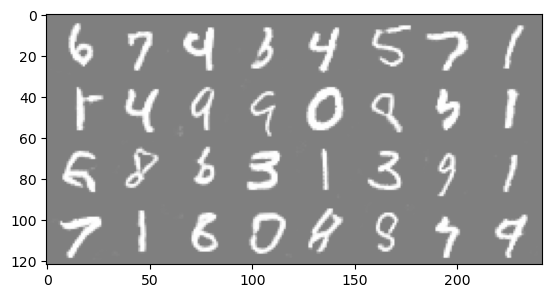

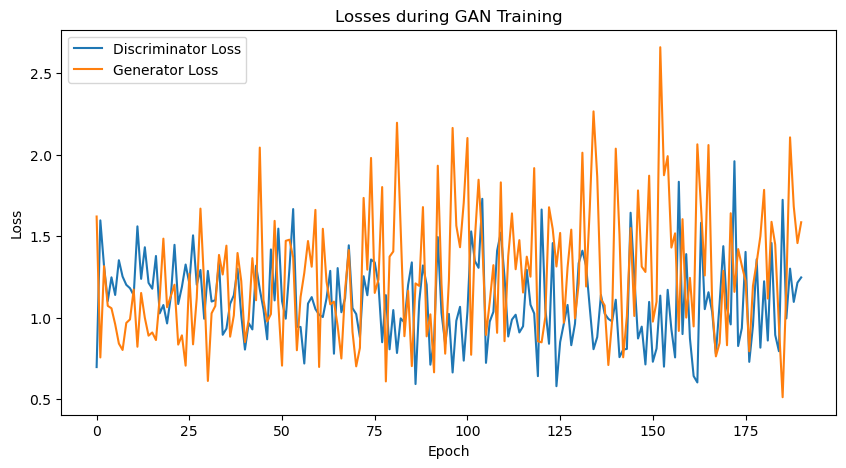

Epoch [192/200], Step [938/938], D Loss: 0.9290, G Loss: 1.3158
Epoch [193/200], Step [938/938], D Loss: 0.9416, G Loss: 1.4906
Epoch [194/200], Step [938/938], D Loss: 0.6299, G Loss: 2.0280
Epoch [195/200], Step [938/938], D Loss: 1.2085, G Loss: 1.2033
Epoch [196/200], Step [938/938], D Loss: 1.5672, G Loss: 1.6483
Epoch [197/200], Step [938/938], D Loss: 1.1289, G Loss: 1.6616
Epoch [198/200], Step [938/938], D Loss: 1.6008, G Loss: 2.4425
Epoch [199/200], Step [938/938], D Loss: 0.8822, G Loss: 0.7760
Epoch [200/200], Step [938/938], D Loss: 1.7822, G Loss: 1.9331
Training completed and models saved.


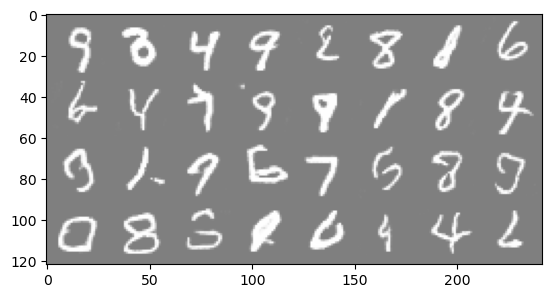

In [112]:
# Training loop
for epoch in range(num_epochs):
    for i, (real_images, _) in enumerate(train_loader):
        real_images = real_images.to(device)
        # noise = torch.randn_like(images) * 0.02  # Add small Gaussian noise
        # noisy_real_images = images + noise
        # noisy_real_images = noisy_real_images.to(device)
        batch_size = real_images.size(0)

        # Create labels for real and fake images
        # rand_real_noise = round(random.uniform(0.7, 1), 1)
        # rand_fake_noise = round(random.uniform(0, 0.3), 1)
        real_labels = torch.ones(batch_size, 1, dtype=torch.float).to(device) #* rand_real_noise # Label smoothing for real labels, replace with random float between .7 and 1.2
        fake_labels = torch.zeros(batch_size, 1, dtype=torch.float).to(device) #* rand_fake_noise # replace fake labels with random float between 0 and .3

        # =================================
        # Training Discriminator

        # Train discriminator with real images
        d_optimizer.zero_grad()
        outputs = discriminator(real_images).view(-1, 1)
        d_loss_real = criterion(outputs, real_labels)
        d_loss_real.backward()

        # Train discriminator with fake images
        noise = torch.randn(batch_size, 100, 1, 1).to(device)
        fake_images = generator(noise)
        outputs = discriminator(fake_images.detach()).view(-1, 1)
        d_loss_fake = criterion(outputs, fake_labels)
        d_loss_fake.backward() # Backward pass
        d_optimizer.step() # Update discriminator weights

        # =================================
        # Training Generator
        #for _ in range(3): # Train generator twice
        g_optimizer.zero_grad()
        # fake_labels_for_g = torch.ones(batch_size, 1).to(device) # Create fake labels for generator. Labels for the fake images are flipped to real.
        # fake_images = generator(noise)
        outputs = discriminator(fake_images).view(-1,1)
        g_loss = criterion(outputs, real_labels)
        g_loss.backward() # Backward pass
        g_optimizer.step() # Update generator weights

        # ===================================
        # Monitor training
        #if i % 100 == 0:
    print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], D Loss: {d_loss_real.item() + d_loss_fake.item():.4f}, G Loss: {g_loss.item():.4f}")
        
    # Store losses for plotting after each epoch
    d_losses.append(d_loss_real.item() + d_loss_fake.item())
    g_losses.append(g_loss.item())

    with torch.no_grad():
        fake_images = generator(noise).cpu()
        grid = torchvision.utils.make_grid(fake_images, normalize=True)
        imshow(grid)

    # Plot the losses every 10 epochs
    if epoch % 10 == 0:
        plt.figure(figsize=(10, 5))
        plt.plot(d_losses, label="Discriminator Loss")
        plt.plot(g_losses, label="Generator Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.title("Losses during GAN Training")
        plt.show()

# Save the generator model and weights
# Saving the model structure as JSON
model_structure = generator.model.__repr__()
with open('generator.json', 'w') as json_file:
    json.dump(model_structure, json_file)

# Saving the model weights
torch.save(generator.state_dict(), 'generator.h5')

print("Training completed and models saved.")

### Evaluation and Results

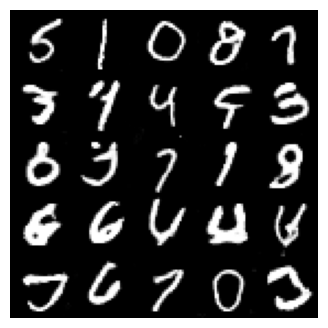

In [117]:
# Generate images
np.random.seed(504)
h = w = 28
num_gen = 25
z_dim = 100

z = np.random.normal(size=[num_gen, z_dim])
z = torch.tensor(z, dtype=torch.float32).view(num_gen, z_dim, 1, 1).to(device)

# Generate images using the trained Generator
generator.eval()  # Set generator to evaluation mode
with torch.no_grad():
    generated_images = generator(z).cpu().numpy()

# plot of generation
n = np.sqrt(num_gen).astype(np.int32)
I_generated = np.empty((h*n, w*n))
for i in range(n):
    for j in range(n):
        I_generated[i*h:(i+1)*h, j*w:(j+1)*w] = generated_images[i*n+j, :].reshape(28, 28)

plt.figure(figsize=(4, 4))
plt.axis("off")
plt.imshow(I_generated, cmap='gray')
plt.show()

In [ ]:
print